In [18]:
import pandas
import pandas as pd
import bz2
import pickle

In [67]:
with bz2.open('09_prepared.pkl.bz2', 'rb') as f:
    df1 = pickle.load(f)
with bz2.open('10_prepared.pkl.bz2', 'rb') as f:
    df2 = pickle.load(f)
with bz2.open('11_prepared.pkl.bz2', 'rb') as f:
    df3 = pickle.load(f)

In [68]:
df = pd.concat([df1, df2, df3])

In [147]:
df['day'] = df['date'].dt.date

In [148]:
fake_ids = []

### Outliers by buying days 

If a customer has come to the store 70 days (out of 91 in 3 months), it is probably not normal

In [149]:
card_unique_days = df.groupby(['id_card_int'])['day'].nunique()

<AxesSubplot:>

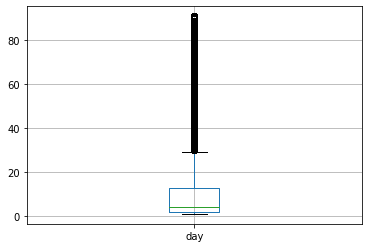

In [150]:
pd.DataFrame(card_unique_days).boxplot()

In [151]:
cdd = pd.DataFrame(card_unique_days)
cdd[cdd['day'] > 70]

,day
id_card_int,
42,72
51,73
80,75
134,75
175,84
...,...
1903932,73
1904617,73
1907927,75


In [152]:
fake_ids.extend(cdd[cdd['day'] > 70].index.values)

### Outliers by mean sum of purchases

If a customer's average check is more than 6000, it's probably fake

<AxesSubplot:>

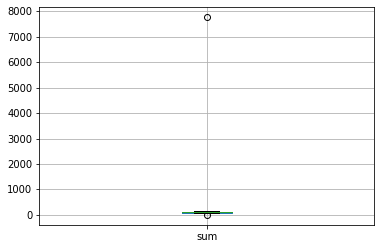

In [153]:
quantity_mean = df[['id_card_int', 'sum']].groupby('id_card_int').mean()
quantity_mean.describe().drop('count').boxplot()

In [154]:
quantity_mean[quantity_mean['sum'] > 6000]

,sum
id_card_int,
790438,6100.000000
1011667,6400.000000
1274345,7072.000000
1728312,6400.000000
1755035,7760.746667
1941741,6002.000000


In [158]:
fake_ids.extend(quantity_mean[quantity_mean['sum'] > 6000].index.values)

### Outliers by number of same bought  items

If a customer has bought more than 1000 of the same item, it's probably not a real buyer

<AxesSubplot:>

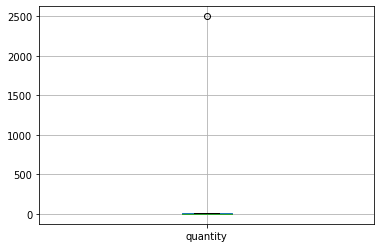

In [159]:
quantity_mean = df[['id_card_int' ,'quantity']].groupby('id_card_int').mean()
quantity_mean.describe().drop('count').boxplot()

In [160]:
quantity_mean[quantity_mean['quantity'] > 1000]

,quantity
id_card_int,
40988,1001.000000
68591,1250.731500
139830,1600.500000
204875,1250.750000
316607,1250.750000
341527,1000.666667
402499,1001.200000
451825,1091.636364
464885,2500.500000


In [161]:
fake_ids.extend(quantity_mean[quantity_mean['quantity'] > 1000].index.values)

### Not really outliers, but weird negative values in quantity and sum

The transactions between shops can also have a sum or quantity as 0, so we will add them to the fake_ids.

However, there are also negative sums and quantities. They probably should be just removed, so I don't add them to outliers list

In [193]:
df[(df['quantity'] == 0) | (df['sum'] == 0)]['id_card_int']

6032         747570
6033         106917
6579         278483
13816        180463
13818        838956
             ...   
46462107     516678
46465112    1147227
46470920    1176200
46470921     745459
46485140     915454
Name: id_card_int, Length: 76742, dtype: int64

In [188]:
df[df['quantity'] < 0]

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int,day
4206093,2020-09-04 09:10:21,827B9591-75EE-EA11-B444-005056A7539A,0,7009929,23074,19269,-1.268,470.43,False,1301664,11939194,2020-09-04
4206103,2020-09-04 09:09:24,F6807973-75EE-EA11-B444-005056A7539A,0,7707981,23074,19269,-1.268,470.43,False,1419650,22549976,2020-09-04
4210123,2020-09-04 08:37:00,49C21AF5-70EE-EA11-B444-005056A7539A,0,5554550,23074,19269,-1.084,402.16,False,1035577,6745380,2020-09-04
4218020,2020-09-04 08:43:37,B681FEE3-71EE-EA11-B444-005056A7539A,0,0643258,23074,19269,-0.001,0.37,False,126995,16694740,2020-09-04
4218022,2020-09-04 08:43:37,B681FEE3-71EE-EA11-B444-005056A7539A,0,0643258,23074,19269,-2.375,881.13,False,126995,16694740,2020-09-04
...,...,...,...,...,...,...,...,...,...,...,...,...
5382631,2020-09-04 09:13:44,8B5F8150-76EE-EA11-B444-005056A7539A,0,8593402,23074,19269,-0.692,256.73,False,1538576,12752264,2020-09-04
5396781,2020-09-04 08:37:49,1CC214FB-70EE-EA11-B444-005056A7539A,0,4916790,23074,19269,-1.236,458.56,False,906517,2630312,2020-09-04
5438902,2020-09-04 09:28:21,E6F17E03-78EE-EA11-B444-005056A7539A,0,5931979,23074,19269,-0.572,212.21,False,1102820,21125316,2020-09-04
5450158,2020-09-04 09:21:17,CD1BCB2C-77EE-EA11-B444-005056A7539A,0,3290674,23074,19269,-0.915,339.47,False,574393,18763274,2020-09-04


In [189]:
df[df['sum'] < 0]

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int,day
4206092,2020-09-04 09:10:21,827B9591-75EE-EA11-B444-005056A7539A,0,7009929,23074,19269,1.268,-470.43,False,1301664,11939194,2020-09-04
4206102,2020-09-04 09:09:24,F6807973-75EE-EA11-B444-005056A7539A,0,7707981,23074,19269,1.268,-470.43,False,1419650,22549976,2020-09-04
4210124,2020-09-04 08:37:00,49C21AF5-70EE-EA11-B444-005056A7539A,0,5554550,23074,19269,1.084,-402.16,False,1035577,6745380,2020-09-04
4218019,2020-09-04 08:43:37,B681FEE3-71EE-EA11-B444-005056A7539A,0,0643258,23074,19269,0.001,-0.37,False,126995,16694740,2020-09-04
4218021,2020-09-04 08:43:37,B681FEE3-71EE-EA11-B444-005056A7539A,0,0643258,23074,19269,2.375,-881.13,False,126995,16694740,2020-09-04
...,...,...,...,...,...,...,...,...,...,...,...,...
5396780,2020-09-04 08:37:49,1CC214FB-70EE-EA11-B444-005056A7539A,0,4916790,23074,19269,1.236,-458.56,False,906517,2630312,2020-09-04
5438901,2020-09-04 09:28:21,E6F17E03-78EE-EA11-B444-005056A7539A,0,5931979,23074,19269,0.572,-212.21,False,1102820,21125316,2020-09-04
5450157,2020-09-04 09:21:17,CD1BCB2C-77EE-EA11-B444-005056A7539A,0,3290674,23074,19269,0.915,-339.47,False,574393,18763274,2020-09-04
5450159,2020-09-04 09:21:17,CD1BCB2C-77EE-EA11-B444-005056A7539A,0,3290674,23074,19269,0.915,-339.47,False,574393,18763274,2020-09-04


### Outliers by high sum in one check

ВкусВилл may be a mid-premium tier shop, but sums more than 10k rub per check are abnormal. But on occasion some users may celebrate something and buy for more, so I will put a threshold at 20k.

In [164]:
check_sum = df[['id_doc_int', 'sum']].groupby(['id_doc_int']).sum()
check_sum.sort_values(['sum'], ascending=False).head(10)

,sum
id_doc_int,
21745256,80405.0
7873674,66732.0
5311106,49848.0
14218897,48005.0
15327274,39650.0
10640662,38429.0
3121608,33860.0
2823436,32530.0
21204490,29063.8


<AxesSubplot:>

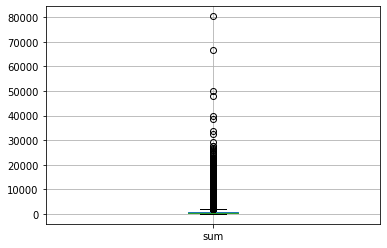

In [165]:
check_sum.boxplot()

In [166]:
check_sum[check_sum['sum'] > 20000]

,sum
id_doc_int,
661595,25699.65
744892,21538.00
934690,20425.35
1066773,20796.81
1245422,27800.00
2823436,32530.00
2937461,22825.48
3121608,33860.00
3788962,20031.45


In [194]:
outliers_check_sum = pd.merge(df[["id_doc_int","id_card_int"]], check_sum[check_sum['sum'] > 20000], on="id_doc_int").drop_duplicates()

In [197]:
outliers_check_sum['id_card_int'].tolist()

[1429536,
 568930,
 568930,
 1750466,
 1929067,
 129282,
 1755035,
 675503,
 154168,
 14078,
 931261,
 1134727,
 200,
 588107,
 639106,
 1914994,
 442230,
 274667,
 1161763,
 320393,
 588107,
 83597,
 225201,
 280,
 442230,
 1914994,
 588107,
 1359470,
 373013,
 1577248,
 384923,
 1577248,
 1577248,
 1577248,
 1577248,
 262976,
 1577248,
 975892,
 1577248,
 1577248,
 1577248,
 1577248,
 702305,
 1577248,
 588107,
 1577248,
 1462455,
 1577248]

In [200]:
fake_ids.extend(outliers_check_sum['id_card_int'].tolist())

### Outliers by total sum of purchases

The total sum of purchases is probably the most ambiguous outlier criteria, but it can help sort out some of the most obvious outliers. I may understand numbers like 100k in 3 months, that would be approx 1k/day, which is okay for a real lover of ВкусВилл, but 200k doesn't sound real, let alone 60 million

In [168]:
customers_sum = df[['id_card_int', 'sum']].groupby(['id_card_int']).sum()
customers_sum.sort_values(['sum'], ascending=False)

,sum
id_card_int,
883386,60016231.51
1577248,1279932.55
568930,379927.61
1028081,292730.00
497966,284392.33
...,...
849914,0.00
1801523,0.00
1380493,0.00


<AxesSubplot:>

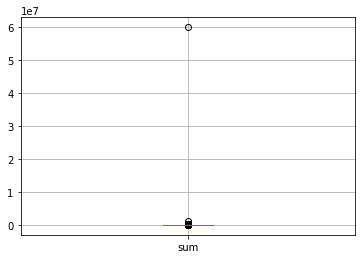

In [169]:
customers_sum.boxplot()

In [170]:
customers_sum['sum'].describe().apply(lambda x: format(x, 'f'))

count     1944075.000000
mean         8075.360227
std         45281.230204
min             0.000000
25%           728.940000
50%          2495.560000
75%          8917.000000
max      60016231.510000
Name: sum, dtype: object

In [171]:
customers_sum[customers_sum['sum'] > 200000]

,sum
id_card_int,
19,209335.94
6581,250633.89
15646,210058.45
46998,246953.70
57748,252742.44
...,...
1539373,201579.76
1577248,1279932.55
1589609,204209.08


In [172]:
fake_ids.extend(customers_sum[customers_sum['sum'] > 200000].index.values)

### Outliers by sum of most quantity of the specific item in check

It's probably unreal to buy like 30 products of the same type in check. You can buy a box of beer (which is ~20 bottles), but what more? 50 bottles of milk? I will allow 50 items for some small things (i.e. прищепки, еще какая-нибудь хрень), but more than that is definitely outliers

Also: as we can see, the values are not integers. I am not sure why is that, my suggestion is that some products are not measured in quantity - vegetables are often measured in kilograms.

In [174]:
max_quantity_sum = df[['id_doc_int', 'quantity', 'id_card_int']].groupby(['id_doc_int']).max()
max_quantity_sum = max_quantity_sum[['quantity', 'id_card_int']].groupby(['id_card_int']).sum()
max_quantity_sum.sort_values(['quantity'], ascending=False)

,quantity
id_card_int,
883386,478079.870
133,154950.961
978368,135204.884
1154256,123046.113
1000162,115031.908
...,...
83280,0.050
893139,0.050
753720,0.044


In [175]:
max_quantity_sum['quantity'].describe().apply(lambda x: format(x, 'f'))

count    1944075.000000
mean          38.425986
std          647.072641
min            0.025000
25%            2.000000
50%            7.338000
75%           24.590000
max       478079.870000
Name: quantity, dtype: object

<AxesSubplot:>

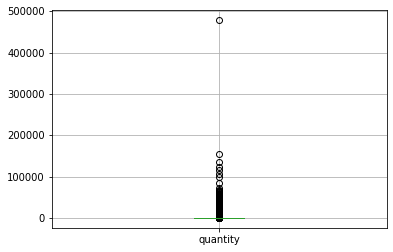

In [176]:
max_quantity_sum.boxplot()

In [177]:
max_quantity_sum[max_quantity_sum['quantity'] > 40]

,quantity
id_card_int,
10,66.780
11,53.184
12,62.000
14,59.704
15,1080.945
...,...
1940409,43.000
1940951,45.000
1941093,53.000


In [178]:
fake_ids.extend(max_quantity_sum[max_quantity_sum['quantity'] > 40].index.values)

## Totals

Total number of fake ids / outliers I have come up with is:

In [201]:
len(fake_ids)

326644

In [202]:
len(set(fake_ids))

313252

In [203]:
outlier_df = pd.DataFrame(fake_ids, columns=['id_card_int'])
outlier_df

,id_card_int
0,42
1,51
2,80
3,134
4,175
...,...
326639,1577248
326640,588107
326641,1577248
326642,1462455


In [204]:
with bz2.open('bad_ids.pkl.bz2', 'wb') as f:
    pickle.dump(outlier_df, f, protocol=4)